1) Given the following dataframe of sales transactions

- create a new column with the number of days since the last sales
- add missing dates, filling missing values for sales_amount with 0
- create a new column with the sale amount of 7 days before
- create a new column with the mean amount of sales for the previous 7 days
- convert the frequency to weekly, summing the sales for each week

In [26]:
import pandas as pd
import numpy as np

data = {
    "date": [
        "2023-05-01", "2023-05-02",
        "2023-05-05", "2023-05-07",
        "2023-05-10", "2023-05-15",
        "2023-05-20", "2023-05-25",
        "2023-05-30", "2023-05-31"
    ],
    "sales_amount": [100, 150, 200, 130, 180, 250, 300, 220, 270, 310]
}

df = pd.DataFrame(data)
#converto le date da stringhe a datetime per poter fare operazioni tra di loro
df['date'] = pd.to_datetime(df['date'])
#numero di giorni dall'ultima vendita
df['days_from_last_sale']=(df['date'] - df['date'].shift(1)).dt.days

# Creo un intervallo di date completo
all_dates = pd.date_range(start=df['date'].min(), end=df['date'].max(), freq='D')

# Imposto la colonna delle date come indice e reinserisco le date mancanti
df = df.set_index('date').reindex(all_dates)

# Rinomino l'indice e riempio i valori NaN con 0
df.index.name = 'date'
df = df.fillna(0) 
#nuova colonna con la quantità di vendite nei sette giorni precedenti
df['sales_per_week'] = df['sales_amount'].rolling(window=7).sum()
#create a new column with the mean amount of sales for the previous 7 days
df['mean_per_week'] = df['sales_amount'].rolling(window=7,center = False).mean()
#convert the frequency to weekly, summing the sales for each week
df_weekly = df.resample('W').sum()
df_weekly

,sales_amount,days_from_last_sale,sales_per_week,mean_per_week
date,,,,
2023-05-07,580.0,6.0,580.0,82.857143
2023-05-14,180.0,3.0,2630.0,375.714286
2023-05-21,550.0,10.0,2710.0,387.142857
2023-05-28,220.0,5.0,2380.0,340.000000
2023-06-04,580.0,6.0,1510.0,215.714286


2) Given the following sales data

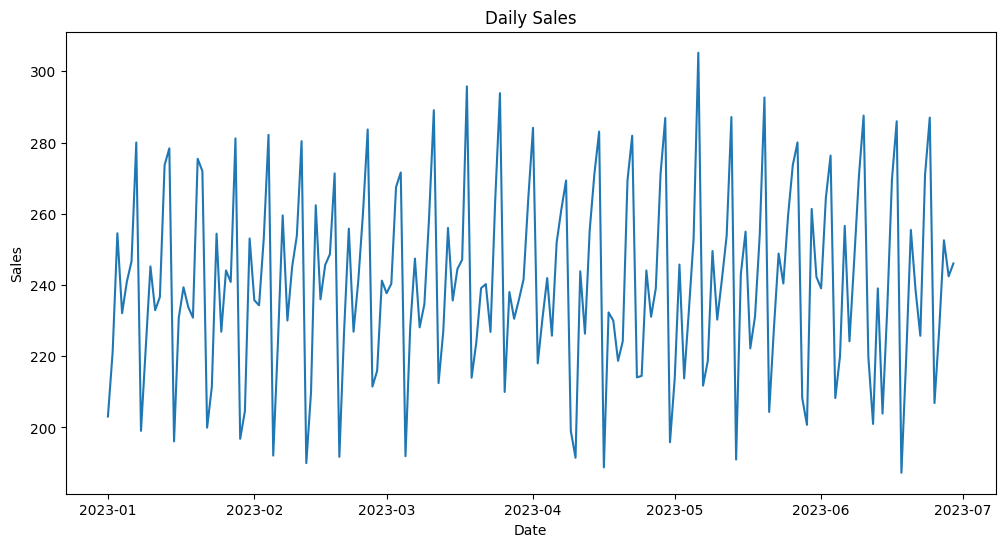

Timestamp('2023-06-29 00:00:00')

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

date_range = pd.date_range(start="2023-01-01", periods=180, freq="D")
values = np.array([200, 220, 250, 230, 240, 260, 280], dtype=float)
sales = np.tile(values, len(date_range) // 7 + 1)[:len(date_range)]
sales += np.random.normal(0, 10, len(sales))
df = pd.DataFrame({"date": date_range, "sales": sales})
df.set_index("date", inplace=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y="sales")
plt.title("Daily Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

date_range[-1]

Use the appropriate Exponential Smoothing model to forecast sales for the following 7 days.<br>
Bonus: plot the historical data and the generated forecast.

In [53]:
#Use the appropriate Exponential Smoothing model to forecast sales for the following 7 days.
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

forecast_horizon = 7
df.index.freq = "D"
future_dates = pd.date_range(start='2023-06-30', periods=7, freq="D")
ses_model = SimpleExpSmoothing(df['sales']).fit()
ses_forecast = ses_model.forecast(forecast_horizon)

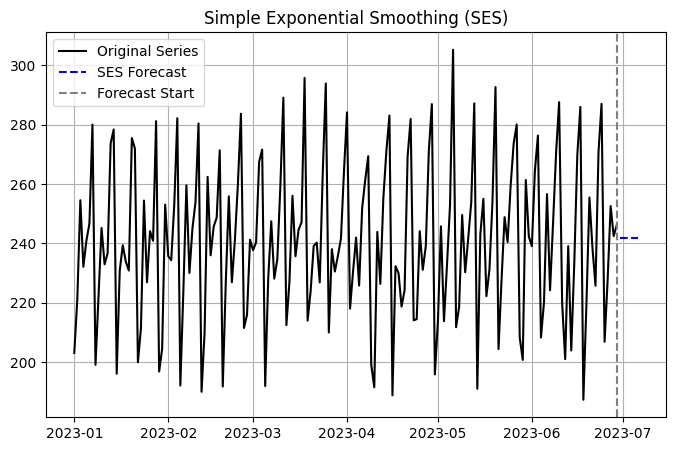

In [54]:
# --- Plot forecasts ---
fig, axes = plt.subplots(1, 1, figsize=(8, 5))

# SES Plot
axes.plot(df.index, df['sales'], label="Original Series", color="black")
axes.plot(future_dates, ses_forecast, label="SES Forecast", linestyle="--", color="blue")
axes.axvline(df.index[-1], color="gray", linestyle="--", label="Forecast Start")
axes.set_title("Simple Exponential Smoothing (SES)")
axes.legend()
axes.grid()